In [1]:
import torch
import torch.nn as nn

In [2]:
test = torch.tensor([[12, 14, 16, 18, 20, 2, 4, 6, 8, 10,],
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
                     [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]],                 
                    dtype=torch.float32
                    )

test = nn.Softmax(dim=1)(test)
test.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000])

In [3]:
reshaped_test = test.view(-1,2,5)

In [4]:
reshaped_test

tensor([[[2.9006e-04, 2.1433e-03, 1.5837e-02, 1.1702e-01, 8.6466e-01],
         [1.3169e-08, 9.7305e-08, 7.1899e-07, 5.3127e-06, 3.9256e-05]],

        [[7.8013e-05, 2.1206e-04, 5.7645e-04, 1.5669e-03, 4.2594e-03],
         [1.1578e-02, 3.1473e-02, 8.5552e-02, 2.3255e-01, 6.3215e-01]],

        [[1.7860e-12, 3.5872e-11, 7.2050e-10, 1.4472e-08, 2.9067e-07],
         [5.8383e-06, 1.1727e-04, 2.3553e-03, 4.7308e-02, 9.5021e-01]],

        [[2.2770e-16, 1.2432e-14, 6.7878e-13, 3.7060e-11, 2.0234e-09],
         [1.1047e-07, 6.0317e-06, 3.2932e-04, 1.7980e-02, 9.8168e-01]]])

In [5]:
torch.max(reshaped_test, dim=1)

torch.return_types.max(
values=tensor([[2.9006e-04, 2.1433e-03, 1.5837e-02, 1.1702e-01, 8.6466e-01],
        [1.1578e-02, 3.1473e-02, 8.5552e-02, 2.3255e-01, 6.3215e-01],
        [5.8383e-06, 1.1727e-04, 2.3553e-03, 4.7308e-02, 9.5021e-01],
        [1.1047e-07, 6.0317e-06, 3.2932e-04, 1.7980e-02, 9.8168e-01]]),
indices=tensor([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]))

In [6]:
import torch
import torch.nn as nn
combined_fc_layers = []
for _ in range(3):
    combined_fc_layers.append(nn.Linear(128, 64))
    combined_fc_layers.append(nn.ReLU())
    input_dim = 64
combined_fc_layers = nn.Sequential(
    *combined_fc_layers, nn.Linear(64, 32), nn.ReLU(), nn.Linear(32, 10)
)


In [7]:
combined_fc_layers[-1]

Linear(in_features=32, out_features=10, bias=True)

In [8]:
import os
import sys
# change current path
os.chdir('..')

In [9]:
import utilities
import models
# Initializing the model
batch_size = 128
output_weeks = 6
# Hyperparameters
num_epochs_entire = 15
hidden_size = 370
num_lstm_layers = 3
embedding_dims = [50, 50, 50, 50, 50, 50, 50, 500]
num_fc_tabular_layers = 3
num_fc_combined_layers = 2
dropout = 0.4
# early stop parameters
early_stop_patience = 5
early_stop_min_delta = 0.001
lr = 8e-5

# Load the data
dfs = utilities.load_dataFrames()
train_loader = utilities.create_dataLoader(
    X_static=dfs["X_tabular_train"],
    X_static_cat=dfs["X_tabular_cat_train"],
    X_time=dfs["X_time_train"],
    y_target=dfs["y_target_train"],
    output_weeks=output_weeks,
    y_past=None,
    batch_size=128,
    shuffle=True,
)
valid_loader = utilities.create_dataLoader(
    X_static=dfs["X_tabular_valid"],
    X_static_cat=dfs["X_tabular_cat_valid"],
    X_time=dfs["X_time_valid"],
    y_target=dfs["y_target_valid"],
    output_weeks=output_weeks,
    y_past=None,
    batch_size=128,
    shuffle=False,
)

len_train_loader = len(
    train_loader
)  # This line is necessary for the scheduler creation.
class2id, id2class = utilities.setup_encoders_targets()
print(dfs["X_tabular_cat_train"].shape[-1])
print(dfs["X_tabular_train"].shape[-1])
print(dfs["X_time_train"].shape[-1])
print(dfs["list_cat"])
model = models.HybridModel(
    num_categorical_features=dfs["X_tabular_cat_train"].shape[-1],
    list_unic_cat=dfs["list_cat"],
    num_numerical_features=dfs["X_tabular_train"].shape[-1],
    num_time_series_features=dfs["X_time_train"].shape[-1],
    hidden_size=hidden_size,
    num_lstm_layers=num_lstm_layers,
    dropout=dropout,
    embedding_dims=embedding_dims,
    num_fc_tabular_layers=num_fc_tabular_layers,
    num_fc_combined_layers=num_fc_combined_layers,
    output_size=output_weeks,
)

8
22
40
[8, 8, 8, 8, 8, 7, 9, 3110]


TypeError: HybridModel.__init__() got an unexpected keyword argument 'num_categorical_features'

In [10]:
model.embeddings

ModuleList(
  (0-4): 5 x Embedding(8, 50)
  (5): Embedding(7, 50)
  (6): Embedding(9, 50)
  (7): Embedding(3110, 500)
)

In [25]:
[nn.Embedding(num_embeddings=i, embedding_dim=dimension) for i, dimension in zip(dfs["list_cat"], embedding_dims)]

[Embedding(8, 50),
 Embedding(8, 50),
 Embedding(8, 50),
 Embedding(8, 50),
 Embedding(8, 50),
 Embedding(7, 50),
 Embedding(9, 50),
 Embedding(3110, 500)]

In [12]:
import numpy as np
75.6496 * np.log(3110 + 176.623) - 41.4457

np.float64(571.1357017337135)

In [17]:
next(model.lstm.named_parameters()).data.shape

AttributeError: 'tuple' object has no attribute 'data'

In [19]:
for name, param in model.named_parameters():
    print(name, param.data.shape)

embeddings.0.weight torch.Size([8, 280])
embeddings.1.weight torch.Size([8, 280])
embeddings.2.weight torch.Size([8, 280])
embeddings.3.weight torch.Size([8, 280])
embeddings.4.weight torch.Size([8, 280])
embeddings.5.weight torch.Size([7, 280])
embeddings.6.weight torch.Size([9, 280])
embeddings.7.weight torch.Size([3110, 280])
tabular_fc_layers.0.weight torch.Size([128, 2262])
tabular_fc_layers.0.bias torch.Size([128])
tabular_fc_layers.2.weight torch.Size([128, 128])
tabular_fc_layers.2.bias torch.Size([128])
tabular_fc_layers.4.weight torch.Size([128, 128])
tabular_fc_layers.4.bias torch.Size([128])
tabular_fc_layers.6.weight torch.Size([64, 128])
tabular_fc_layers.6.bias torch.Size([64])
lstm.weight_ih_l0 torch.Size([1480, 21])
lstm.weight_hh_l0 torch.Size([1480, 370])
lstm.bias_ih_l0 torch.Size([1480])
lstm.bias_hh_l0 torch.Size([1480])
lstm.weight_ih_l1 torch.Size([1480, 370])
lstm.weight_hh_l1 torch.Size([1480, 370])
lstm.bias_ih_l1 torch.Size([1480])
lstm.bias_hh_l1 torch.Size

In [4]:
for i in range(1):
    print(i)

0


In [3]:
import matplotlib.pyplot as plt

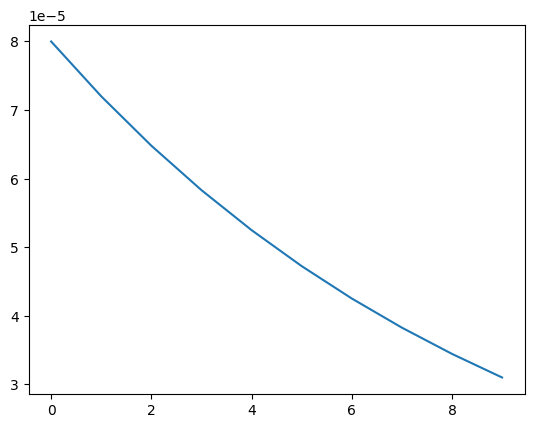

In [4]:
import torch
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=8e-5)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
lrs = []


for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

